In [11]:
import openai
from dotenv import dotenv_values
from utils import load_image_as_bytes, download_image, plot_images

config = dotenv_values(".env")
openai.api_key = config['OPENAI_API_KEY']


# Image generation 

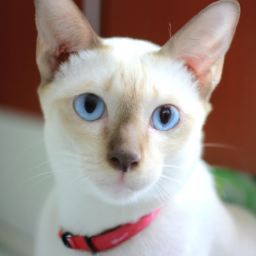

In [12]:
image_prompt = "a white siamese cat"
response = openai.Image.create(
  prompt=image_prompt,
  n=1,
  size="256x256"
)
image_url = response['data'][0]['url']
cat_image = download_image(image_url)
Image(filename=cat_image)

# Image Edition

In [13]:
# image requirements
# must be a png
# must have equal width and height
response = openai.Image.create_edit(
  image=load_image_as_bytes("data/person.png"),
  mask=load_image_as_bytes("data/person_mask_dog.png"),
  prompt="A happy rottweiler running",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']

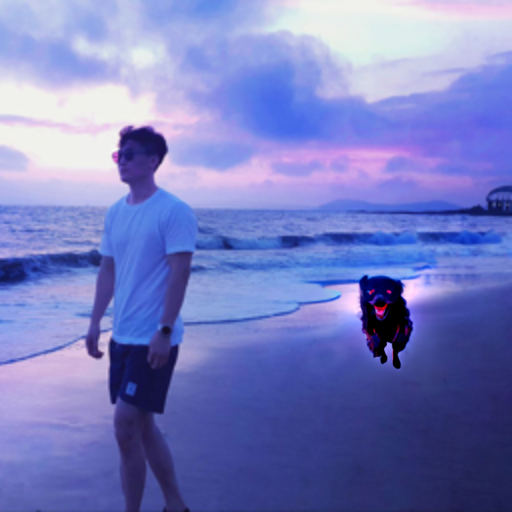

In [14]:
# diplay image, mask and result
rottweiler_image = download_image(image_url)
Image(filename=rottweiler_image) 

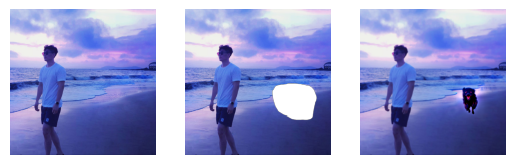

In [15]:
plot_images(["data/person.png", "data/person_mask_dog.png", rottweiler_image])

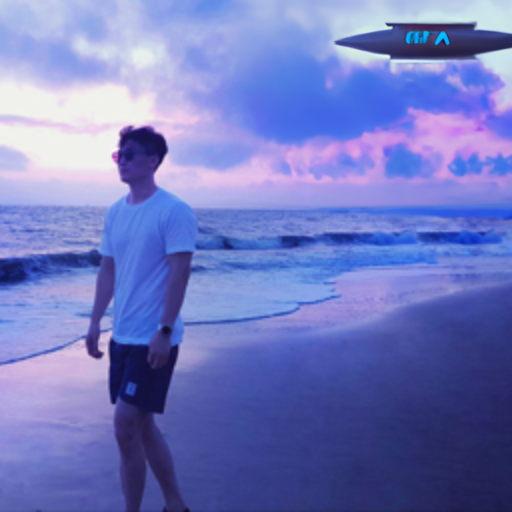

In [16]:
# image requirements
# must be a png
# must have equal width and height
response = openai.Image.create_edit(
  image=load_image_as_bytes("data/person.png"),
  mask=load_image_as_bytes("data/person_mask_space_ship.png"),
  prompt="A sci-fi space ship",
  n=1,
  size="512x512"
)
image_url = response['data'][0]['url']
# diplay image, mask and result
space_ship_image = download_image(image_url)
Image(filename=space_ship_image) 

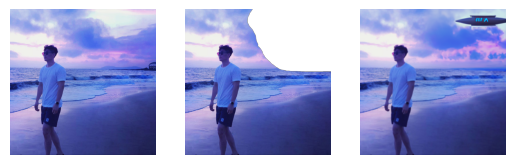

In [17]:
plot_images(['data/person.png', 'data/person_mask_space_ship.png', space_ship_image])

# Variations of an image

In [18]:
response = openai.Image.create_variation(
  image=load_image_as_bytes(cat_image, image_size=(256, 256)),
  n=3,
  size="256x256"
)
image_urls = [image['url'] for image in response['data']]
# diplay image, mask and result
variations = [download_image(image_url) for image_url in image_urls]

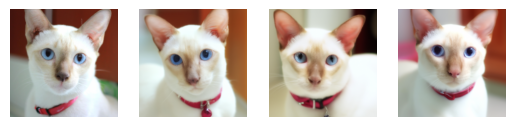

In [20]:
plot_images([cat_image, *variations])